## sklearn.tree.DecisionTreeRegressor

In [3]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [172]:
Data=pd.read_csv('Result_dataset_130.csv')
features = Data.columns[0:13]
target = Data.columns[13:17]
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
col = Data.columns
cv = KFold(n_splits=10)
X = Data[features]
y = Data[Head]

# Validation curves

In [173]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# max_leaf_nodes
- int or None, default=31
- The maximum number of leaves for each tree. Must be strictly greater than 1. If None, there is no maximum limit.

In [174]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

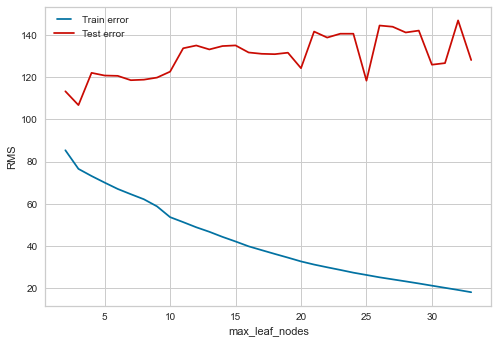

In [175]:
learning_rates = np.arange(2, 34, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(max_leaf_nodes=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_leaf_nodes')
plt.show()

# Max_depth
- int or None, default=None
- The maximum depth of each tree. The depth of a tree is the number of edges to go from the root to the deepest leaf. Depth isn’t constrained by default.

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

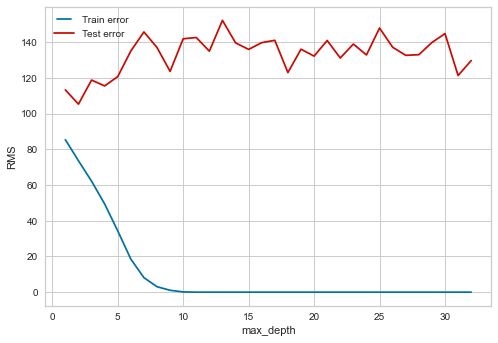

In [177]:
learning_rates = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_leaf
- int, default=20
- The minimum number of samples per leaf. For small datasets with less than a few hundred samples, it is recommended to lower this value since only very shallow trees would be built.

In [178]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

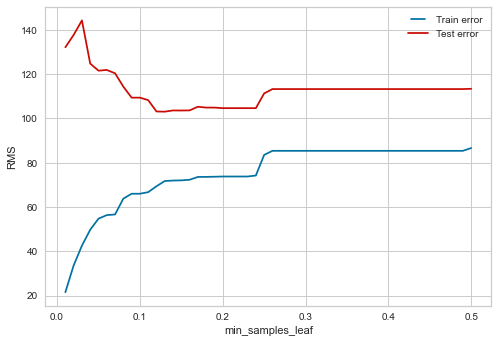

In [179]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

## min_samples_split

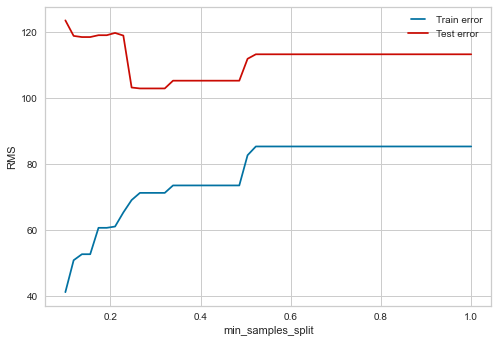

In [180]:
learning_rates = np.linspace(0.1, 1, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = DecisionTreeRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

---
---

# Decision Hyperparameter Grid

In [157]:
X=Data[features]
y=Data[Head]

In [181]:
max_features = ['auto','sqrt',0.5]
max_depth = [5,10,20,25,30]
min_samples_split = [0.05,0.06,0.07,0.08,0.09,0.1]
min_samples_leaf = [0.009,0.01,0.02,0.03,0.05]
criterion=['mse','mae']
max_leaf_nodes = [2,5,7,9,10,11,12,13,14,15,20,25,30]

Decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'criterion': criterion}

In [182]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = Decision_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.1s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'max_leaf_nodes': [2, 5, 7, 9, 10, 11,
                                                           12, 13, 14, 15, 20,
                                                           25, 30],
                                        'min_samples_leaf': [0.009, 0.01, 0.02,
                                                             0.03, 0.05],
                                        'min_samples_split': [0.05, 0.06, 0.07,
                                                              0.08, 0.09,
                                                              0.1]},
                   random_state=42, verbose=2)

In [183]:
rf_random.best_params_

{'min_samples_split': 0.06,
 'min_samples_leaf': 0.05,
 'max_leaf_nodes': 30,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'mae'}

In [184]:
#chest
# mod=DecisionTreeRegressor(max_depth=20, max_features=0.5,
#                       min_samples_leaf=0.03, min_samples_split=0.08,
#                       criterion= 'mse',max_leaf_nodes = 13)
# Neck force
# mod=DecisionTreeRegressor(max_depth=10, max_features=0.5,
#                       min_samples_leaf=0.01, min_samples_split=0.09,
#                       criterion= 'mse',max_leaf_nodes = 7)
# Head acceleration
# mod=DecisionTreeRegressor(max_depth=30, max_features=0.5,
#                       min_samples_leaf=0.03, min_samples_split=0.07,
#                       criterion= 'mse',max_leaf_nodes = 15)
# HIC15
mod=DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_samples_leaf=0.05, min_samples_split=0.06,
                      criterion= 'mse',max_leaf_nodes = 30)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

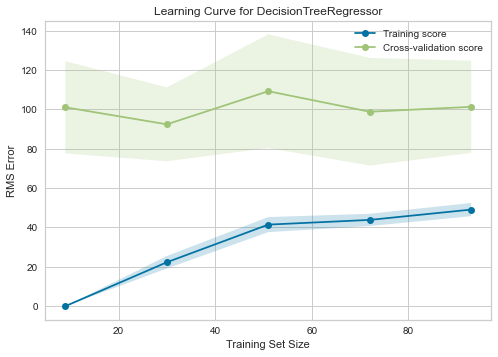

In [185]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [186]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 115.072388

Root Mean squared error: 76.842285

Root Mean squared error: 125.092937

Root Mean squared error: 131.408575

Root Mean squared error: 106.447420

Root Mean squared error: 67.211800

Root Mean squared error: 111.054855

Root Mean squared error: 48.541434

Root Mean squared error: 109.985370

Root Mean squared error: 106.998303

error COV--->0    0.900666
dtype: float64  error mean --->0    89.336607
Name: mean, dtype: float64  error std --->0    80.462469
Name: std, dtype: float64


---
---

# Grid search

In [187]:
# Chest deflection, Neck force
# max_features = ['auto','sqrt',0.5]
# max_depth = [5,10,20,25]
# min_samples_split = [0.08,0.085,0.09,0.095]
# min_samples_leaf = [0.009,0.0095,0.01]
# criterion=['mse','mae']
# max_leaf_nodes = [5,6,7]

# Head acceleration
# max_features = ['auto','sqrt',0.5]
# max_depth = [30,32,34,36]
# min_samples_split = [0.05,0.06,0.062,0.065,0.068,0.07]
# min_samples_leaf = [0.009,0.01,0.015,0.02,0.025,0.03]
# criterion=['mse','mae']
# max_leaf_nodes = [15,16,17,18]

#HIC15
max_features = ['auto','sqrt',0.5]
max_depth = [30,32,34,36]
min_samples_split = [0.05,0.055,0.056,0.058,0.06]
min_samples_leaf = [0.05,0.055,0.06,0.065]
criterion=['mse','mae']
max_leaf_nodes = [30,31,32,33,34]

Decision_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'criterion': criterion}

In [204]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
features = Data.columns[0:13]
X=Data[features]
y=Data[Head_acceleration]

In [189]:
rf = DecisionTreeRegressor()
reg = GridSearchCV(rf,param_grid = Decision_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 9328 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 15168 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 22288 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:   51.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [30, 32, 34, 36],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'max_leaf_nodes': [30, 31, 32, 33, 34],
                         'min_samples_leaf': [0.05, 0.055, 0.06, 0.065],
                         'min_samples_split': [0.05, 0.055, 0.056, 0.058,
                                               0.06]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [190]:
reg.best_params_

{'criterion': 'mae',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 0.055,
 'min_samples_split': 0.05}

In [205]:
#chest deflection
# mod=DecisionTreeRegressor(max_depth=20, max_features=0.5,
#                       min_samples_leaf=0.03, min_samples_split=0.085,
#                       criterion= 'mse',max_leaf_nodes = 13)
# Neck force
# mod=DecisionTreeRegressor(max_depth=5, max_features=0.5,
#                       min_samples_leaf=0.01, min_samples_split=0.09,
#                       criterion= 'mse',max_leaf_nodes = 7)
# # Head acceleration
# mod=DecisionTreeRegressor(max_depth=32, max_features=0.5,
#                       min_samples_leaf=0.025, min_samples_split=0.06,
#                       criterion= 'mse',max_leaf_nodes = 17)
# # HIC15
# mod=DecisionTreeRegressor(max_depth=30, max_features='auto',
#                       min_samples_leaf=0.055, min_samples_split=0.05,
#                       criterion= 'mae',max_leaf_nodes = 30)

## Learning Curve

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

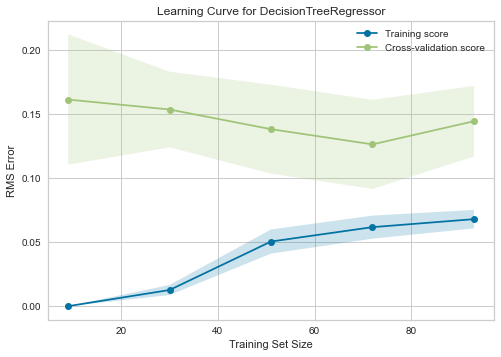

In [206]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [207]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.084640

Root Mean squared error: 0.101811

Root Mean squared error: 0.113257

Root Mean squared error: 0.168090

Root Mean squared error: 0.089433

Root Mean squared error: 0.097236

Root Mean squared error: 0.121256

Root Mean squared error: 0.140474

Root Mean squared error: 0.147251

Root Mean squared error: 0.116251

error COV--->0    0.898192
dtype: float64  error mean --->0    0.086426
Name: mean, dtype: float64  error std --->0    0.077627
Name: std, dtype: float64


## Train score

In [199]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.143447
dtype: float64  error mean --->0    40.870876
Name: mean, dtype: float64  error std --->0    46.733674
Name: std, dtype: float64
